In [1]:
import pandas as pd
import re

import time

Done:
- Scraping reddit to CSV
- CSV to Pandas Dataframe


- Run SentimentGrapher on Dataframe
- Run WordCounter on Dataframe



ToDo:
- (Put DataframeExtractor in AnalysisClass instead of outside loop?)
- Make DataframeExtractor column_value accept regex queries rather than just a value - DONE 
- Modify EmbeddingComparer to see most quintessential wordcounts (and not replicate Scattertext?)


### Scraping Reddit

In [2]:
subs = ["worldpolitics", "anime_titties"]
#maxs = 1000 # I LITERALLY TRIED FOR HOURS TO HAVE THIS NOT HARD CODED DEAR GOD PLEASE HELP ME #TODO

In [3]:
# %run scripts/Submissions_edit.py 
# %run scripts/Comments_edit.py

# submissioninit(subs)
# commentsinit(subs)

In [ ]:
%run scripts/Submissions_edit.py 25000
# %run scripts/Comments_edit.py 2000

submissioninit(subs)
# commentsinit(subs)

Max submissions set to 25000
Downloading: worldpolitics
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 submissions
Downloading: 99 subm

In [5]:
#%run scripts/Comments_edit.py 2000  # OLD?
#commentsinit(subs)

### WHY ARE THERE SUDDENLY ONLY A 100 COMMENTS?

In [6]:
#subs = ["learnpython", "askreddit"]

#%run scripts/Submissions_edit.py 25000
#%run scripts/Comments_edit.py 2000 

#submissioninit(subs)
#commentsinit(subs)


In [10]:
%run code/AnalysisClasses.py

def CSVtoDF(subreddit, contenttype):
    submissions = pd.read_csv("csvs/" + subreddit + "-submissions.csv") 
    comments = pd.read_csv("csvs/" + subreddit + "-comments.csv")
    if contenttype == 'comments':
        return comments
    if contenttype == 'submissions':
        return submissions

In [11]:
worldpolitics_submissions = CSVtoDF('worldpolitics', 'submissions')
worldpolitics_comments = CSVtoDF('worldpolitics', 'comments')
anime_titties_submissions = CSVtoDF('anime_titties', 'submissions')
anime_titties_comments = CSVtoDF('anime_titties', 'comments')

In [12]:
print(worldpolitics_comments)


                 datetime            author  \
0     2020-07-22 16:56:34            nomull   
1     2020-07-22 16:56:11            nomull   
2     2020-07-22 16:55:53       breadgod_AJ   
3     2020-07-22 16:52:42   HadSomeTraining   
4     2020-07-22 16:51:43       AbsoluteYes   
...                   ...               ...   
4995  2020-07-20 00:33:44  AtrociousAtNames   
4996  2020-07-20 00:32:43  thetitanofworlds   
4997  2020-07-20 00:29:37        leeg-hoofd   
4998  2020-07-20 00:28:36     CaptnFlounder   
4999  2020-07-20 00:27:58     French-dudev2   

                                                   body  
0          It’s straight up some cock and balls my dude  
1     So you’re telling me that you need a new eyegl...  
2                   i guess the sub is back to porn lol  
3     At the store where they sell things for you to...  
4     Disgusting. This should be illegal. Go to "mak...  
...                                                 ...  
4995                         

In [13]:
%run code/AnalysisClasses.py
worldpolitics_comments = AnalysisClasses.DateFilterADF(dataframe=worldpolitics_comments, min_date="2020-07-02 00:00:00")

min date is time.struct_time(tm_year=2020, tm_mon=7, tm_mday=2, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=184, tm_isdst=-1)


In [14]:
print(worldpolitics_comments)

                 datetime            author  \
0     2020-07-22 16:56:34            nomull   
1     2020-07-22 16:56:11            nomull   
2     2020-07-22 16:55:53       breadgod_AJ   
3     2020-07-22 16:52:42   HadSomeTraining   
4     2020-07-22 16:51:43       AbsoluteYes   
...                   ...               ...   
4995  2020-07-20 00:33:44  AtrociousAtNames   
4996  2020-07-20 00:32:43  thetitanofworlds   
4997  2020-07-20 00:29:37        leeg-hoofd   
4998  2020-07-20 00:28:36     CaptnFlounder   
4999  2020-07-20 00:27:58     French-dudev2   

                                                   body  
0          It’s straight up some cock and balls my dude  
1     So you’re telling me that you need a new eyegl...  
2                   i guess the sub is back to porn lol  
3     At the store where they sell things for you to...  
4     Disgusting. This should be illegal. Go to "mak...  
...                                                 ...  
4995                         

### Analyzing reddit

#### Selecting a column + column value

In [15]:
%run code/AnalysisClasses.py

#AutoModerator = DataframeExtractor(worldpolitics_comments, 'author', ['AutoModerator'])
#AutoModerator = DataframeExtractor(worldpolitics_comments, 'author', ['AutoModerator'], textonly="yes")
multipleauthors = DataframeExtractor(dataframe=worldpolitics_comments, column='author', columnvalue=['AutoModerator', 'LordJohnStark', 'PrimalMusk'])
print(multipleauthors)

#wp_com_2020 = AnalysisClasses.DataframeExtractor(worldpolitics_comments, 'datetime') # TODO filter for time etc

                 datetime         author  \
376   2020-07-22 09:16:12  AutoModerator   
385   2020-07-22 09:12:59  AutoModerator   
1032  2020-07-22 03:29:30  AutoModerator   
2959  2020-07-21 03:07:27  AutoModerator   
4454  2020-07-20 08:46:42  AutoModerator   
4859  2020-07-20 04:02:14  AutoModerator   

                                                   body  
376   We do not currently accept submissions from ne...  
385   We do not currently accept submissions from ne...  
1032  We do not currently accept submissions from ne...  
2959  We do not currently accept submissions from ne...  
4454  We do not currently accept submissions from ne...  
4859  We do not currently accept submissions from ne...  


#### Integrating that with Sentiment Analysis

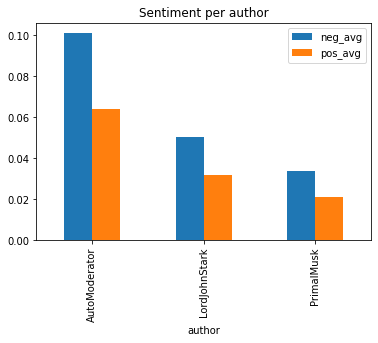

<Figure size 432x288 with 0 Axes>

In [16]:
#TODO DataframeExtractor in same class?
%run code/AnalysisClasses.py

#sen = AnalysisClasses.SentimentGrapher(dataframe=worldpolitics_comments, column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']))
sen = AnalysisClasses.SentimentGrapher(dataframe=worldpolitics_comments, column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']), plotname='plots/sentiment_author_trial', plotkind='bar')
#print(sen)

In [17]:
# worldpolitics_comments_20200702 = AnalysisClasses.DateFilterADF(dataframe=worldpolitics_comments, min_date="2020-07-02 00:00:00")

# start = time.strptime(our_date, "%Y-%m-%d %H:%M:%S" )
# week_start_day = int( ( time.tm_yday - time.tm_wday ) / 7 )
# time.tm_yday = week_start_day * 7
# time.tm_wday = 0
# end = time(start)
# end = end.timedelta(days=7)

In [18]:
today = datetime.today()
print(today)

from datetime import timedelta
intwoweeks = today + timedelta(weeks=2)
print(intwoweeks)
#today_week = today.timedelta(weeks)

#twoweekdifference = 
# @TODO

2020-07-23 12:34:26.741961
2020-08-06 12:34:26.741961


min date is time.struct_time(tm_year=2019, tm_mon=7, tm_mday=2, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=183, tm_isdst=-1)


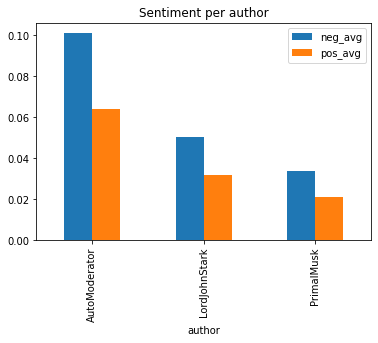

          author   neg_avg   neu_avg   pos_avg
0  AutoModerator  0.101000  0.835000  0.064000
0  LordJohnStark  0.050500  0.417500  0.032000
0     PrimalMusk  0.033667  0.278333  0.021333


<Figure size 432x288 with 0 Axes>

In [19]:
%run code/AnalysisClasses.py
sen = AnalysisClasses.SentimentGrapher(dataframe=AnalysisClasses.DateFilterADF(worldpolitics_comments,min_date="2019-07-02 00:00:00"), column='author', column_value=(['AutoModerator', 'LordJohnStark', 'PrimalMusk']), plotname='plots/sentiment_author_trial', plotkind='bar')

print(sen)

#### Wordcount test

In [121]:
%run code/AnalysisClasses.py
users_to_examine = ["dogmodoga","lonliestmonroni", "Jaracgos", "AutoModerator"]
animetitties_users = {}
total_count = {}
for i in users_to_examine:
    data = AnalysisClasses.WordCounter(dataframe=anime_titties_comments, column='author', column_value=[i])

    animetitties_users[i] = {"text":data[0],"total_wc":data[1]}
    
#print("users keys:", animetitties_users.keys())
print("users", animetitties_users)

totalwordcounts 0
totalwordcounts 0
totalwordcounts 2175
totalwordcounts 26533
users {'dogmodoga': {'text': Counter(), 'total_wc': 0}, 'lonliestmonroni': {'text': Counter(), 'total_wc': 0}, 'Jaracgos': {'text': Counter({'the': 91, 'to': 56, 'of': 55, 'a': 50, 'and': 40, 'gt': 39, 'in': 38, 'it': 32, 'i': 29, 'this': 28, 'is': 24, 'you': 24, 'that': 24, 'been': 23, 'was': 22, 'not': 22, 's': 21, 'on': 20, 'has': 18, 'be': 17, 'your': 17, 'for': 16, 'said': 16, 't': 13, 'have': 13, 'but': 13, 'if': 13, 'or': 12, 'at': 12, 'by': 11, 'news': 10, 'had': 10, 'an': 10, 'with': 10, 'feel': 9, 'removed': 9, 'rule': 9, 'only': 9, 'were': 9, 'police': 9, 'would': 8, 'no': 8, 'we': 8, 'more': 7, 'they': 7, 'from': 7, 'warning': 7, 'will': 7, 'about': 6, 'could': 6, 'comment': 6, 'what': 6, 'article': 6, 'first': 6, 're': 6, 'due': 6, 'violation': 6, 'post': 6, 'world': 6, 'us': 6, 'did': 6, 'being': 6, 'china': 6, 'ministry': 6, 'as': 6, 'u': 6, 'all': 6, 'are': 6, 'mr': 6, 'he': 6, 'their': 6, 's

In [55]:
print(animetitties_users[users_to_examine[2]] - animetitties_users[users_to_examine[3]])

Counter({'gt': 39, 'in': 38, 'it': 32, 'is': 24, 'that': 24, 'been': 23, 'not': 22, 'has': 18, 'be': 17, 'said': 16, 't': 13, 'but': 13, 'at': 12, 'had': 10, 'an': 10, 'feel': 9, 'removed': 9, 'rule': 9, 'only': 9, 'were': 9, 'police': 9, 'would': 8, 'no': 8, 'more': 7, 'they': 7, 'from': 7, 'warning': 7, 'will': 7, 'about': 6, 'could': 6, 'comment': 6, 'what': 6, 'first': 6, 're': 6, 'due': 6, 'violation': 6, 'post': 6, 'world': 6, 'us': 6, 'did': 6, 'being': 6, 'china': 6, 'ministry': 6, 'as': 6, 'u': 6, 'all': 6, 'are': 6, 'mr': 6, 'he': 6, 'their': 6, 'story': 5, 'article': 5, 'don': 5, 'them': 5, 'should': 5, 'ban': 5, 'church': 5, 'thank': 5, 'people': 5, 'decision': 5, 'than': 5, 'submission': 5, 'iran': 5, 'last': 5, 'abello': 5, 'other': 5, 'like': 4, 'taken': 4, 'those': 4, 'my': 4, 'here': 4, 'same': 4, 'consider': 4, 'result': 4, 'opinion': 4, 'which': 4, 'international': 4, 'official': 4, 'rights': 4, 'back': 4, 'reuters': 4, 'britain': 4, 'huawei': 4, 'its': 4, 'good': 4,

In [172]:
def IntersectionalDifferences(a,b):

    def SortByFrequency(i):
        return(a['text'][i]-b['text'][i])
    
    def SortByUsageOfA(i):
        return(a[i])
    
    def sortByARatio(i):
        return(new_intersectional_list[i]["a_ratio"])
    
    intersection = set(a["text"]).intersection(set(b["text"]))
    intersection_list = list(intersection)
    #intersection_list.sort(key=SortByUsageOfA,reverse=True)
    intersection_list.sort(key=SortByFrequency,reverse=True)
    
    a_wc = a['total_wc']
    print('a_wc', a_wc)
    b_wc = b['total_wc']
    print('b_wc', b_wc)
    print("\nnormalisation: a/b={:.3f}, b/a={:.3f}\n".format(a_wc/b_wc, b_wc/a_wc))


    new_intersectional_list = {x:{"ab":(a['text'][x] * b_wc/a_wc),\
                                   "ba":(b['text'][x] * a_wc/b_wc),\
                                   "a_ratio":b_wc/a_wc,\
                                   "b_ratio":a_wc/b_wc,\
                                   "a_count":a['text'][x],\
                                   "b_count":b['text'][x],\
                                   "freq":SortByFrequency(x)} for x in intersection_list}
    sorted(new_intersectional_list.items(),\
           key=lambda x:\
           x["a_ratio"])
    return(new_intersectional_list)
    
my_stuff=IntersectionalDifferences( animetitties_users[users_to_examine[2]],animetitties_users[users_to_examine[3]] )
import pprint
pp=pprint.PrettyPrinter()
print("my_stuff!:")
pp.pprint(my_stuff["we"])
"""see https://stackoverflow.com/a/4215710/203472"""

a_wc 2175
b_wc 26533

normalisation: a/b=0.082, b/a=12.199



TypeError: tuple indices must be integers or slices, not str

In [130]:
def Differences(a,b):

    def SortByFrequency(i):
        try:
            return(a['text'][i]-b['text'][i])
        except e:
            return 0
    
    def SortByUsageOfA(i):
        return(a[i])
    
    difference = set(a['text']).difference(set(b['text']))
    difference_list = list(difference)
    
    intersection = set(a["text"]).intersection(set(b["text"]))
    intersection_list = list(intersection)
    
    AButNotBPlusAAndB = (difference_list + intersection_list)
    AButNotBPlusAAndB.sort(key=SortByFrequency,reverse=True)

    for key in AButNotBPlusAAndB:
        print("{:15s}: user_a={:3}, user_b={:3} (difference:{:2})".format(key,a['text'][key],b['text'][key],SortByFrequency(key)))
                           
Differences(animetitties_users[users_to_examine[2]],animetitties_users[users_to_examine[3]])

gt             : user_a= 39, user_b=  0 (difference:39)
in             : user_a= 38, user_b=  0 (difference:38)
it             : user_a= 32, user_b=  0 (difference:32)
is             : user_a= 24, user_b=  0 (difference:24)
that           : user_a= 24, user_b=  0 (difference:24)
been           : user_a= 23, user_b=  0 (difference:23)
not            : user_a= 22, user_b=  0 (difference:22)
has            : user_a= 18, user_b=  0 (difference:18)
be             : user_a= 17, user_b=  0 (difference:17)
said           : user_a= 16, user_b=  0 (difference:16)
t              : user_a= 13, user_b=  0 (difference:13)
but            : user_a= 13, user_b=  0 (difference:13)
at             : user_a= 12, user_b=  0 (difference:12)
had            : user_a= 10, user_b=  0 (difference:10)
an             : user_a= 10, user_b=  0 (difference:10)
rule           : user_a=  9, user_b=  0 (difference: 9)
removed        : user_a=  9, user_b=  0 (difference: 9)
feel           : user_a=  9, user_b=  0 (differe

In [131]:
# Correlation (both)

def UnionDifferences(a,b):
    
    def SortByFrequency(i):
        return(a['text'][i]-b['text'][i])
    
    def SortByUsageOfA(i):
        return(a[i])
    
    union = set(a['text']).union(set(b['text']))
    union_list = list(union)
    #intersection_list.sort(key=SortByUsageOfA,reverse=True)
    union_list.sort(key=SortByFrequency,reverse=True)
    
    update_union_list = {}
    for key in union_list:
        update_union_list[key]={"a":a['text'][key],"b":b['text'][key],"f":SortByFrequency(key)}
        print("{:15s}: user_a={:3}, user_b={:3} (difference:{:2})".format(key,a['text'][key],b['text'][key],SortByFrequency(key)))
    return update_union_list

union_list = UnionDifferences(animetitties_users[users_to_examine[2]],animetitties_users[users_to_examine[3]])                  

gt             : user_a= 39, user_b=  0 (difference:39)
in             : user_a= 38, user_b=  0 (difference:38)
it             : user_a= 32, user_b=  0 (difference:32)
is             : user_a= 24, user_b=  0 (difference:24)
that           : user_a= 24, user_b=  0 (difference:24)
been           : user_a= 23, user_b=  0 (difference:23)
not            : user_a= 22, user_b=  0 (difference:22)
has            : user_a= 18, user_b=  0 (difference:18)
be             : user_a= 17, user_b=  0 (difference:17)
said           : user_a= 16, user_b=  0 (difference:16)
t              : user_a= 13, user_b=  0 (difference:13)
but            : user_a= 13, user_b=  0 (difference:13)
at             : user_a= 12, user_b=  0 (difference:12)
had            : user_a= 10, user_b=  0 (difference:10)
an             : user_a= 10, user_b=  0 (difference:10)
rule           : user_a=  9, user_b=  0 (difference: 9)
removed        : user_a=  9, user_b=  0 (difference: 9)
feel           : user_a=  9, user_b=  0 (differe

In [ ]:
print(union_list)

#### Wordcount comparer

In [ ]:
# TODO
"""see AnalysisClasses.EmbeddingComparer and modify"""


In [ ]:
anime_titties_submissions